**PROBLEM STATEMENT: The aim of this project is to predict online payment frauds**

In [1]:
import pandas as pd
import numpy as np

In [2]:
fraud_df=pd.read_csv('fraud.csv')

**Features in this dataset**

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig:customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrg: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recepient before the transaction

newbalanceDest: the new balance of the receipient after the transaction

isFraud: fraud transaction

In [3]:
fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
fraud_df.shape

(6362620, 11)

In [5]:
type=fraud_df['type'].value_counts()
type

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
transaction_type=type.index
transaction_type

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object', name='type')

In [7]:
amount_of_transactions=type.values
amount_of_transactions

array([2237500, 2151495, 1399284,  532909,   41432], dtype=int64)

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
fraud_df['type']=labelencoder.fit_transform(fraud_df['type'])

In [9]:
fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
labelencoder.classes_

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

In [11]:
label_mapping = pd.DataFrame({
    'Original Type': labelencoder.classes_,
    'Encoded Label': range(len(labelencoder.classes_))
})
label_mapping

,Original Type,Encoded Label
0,CASH_IN,0
1,CASH_OUT,1
2,DEBIT,2
3,PAYMENT,3
4,TRANSFER,4


In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
fraud_df['nameOrig']=labelencoder.fit_transform(fraud_df['nameOrig'])

In [13]:
fraud_df=fraud_df[["step","type","amount","nameOrig","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud","isFlaggedFraud"]]

<Axes: title={'center': 'missing data visualization in the dataset'}>

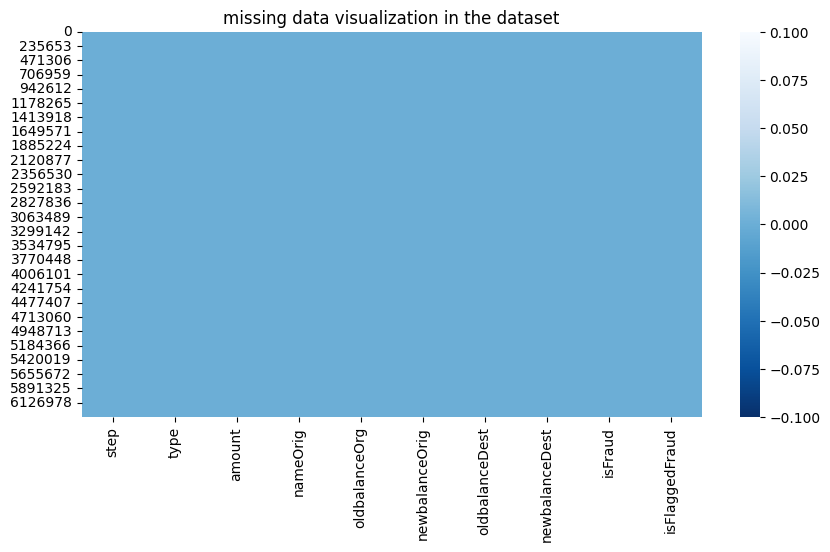

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(fraud_df.isnull(), cbar =True, cmap= "Blues_r")

**There is no missing values in the dataset**

**EXPLORATORY DATA ANALYSIS**

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Correlation

Text(0, 0.5, 'count of online transaction type ')

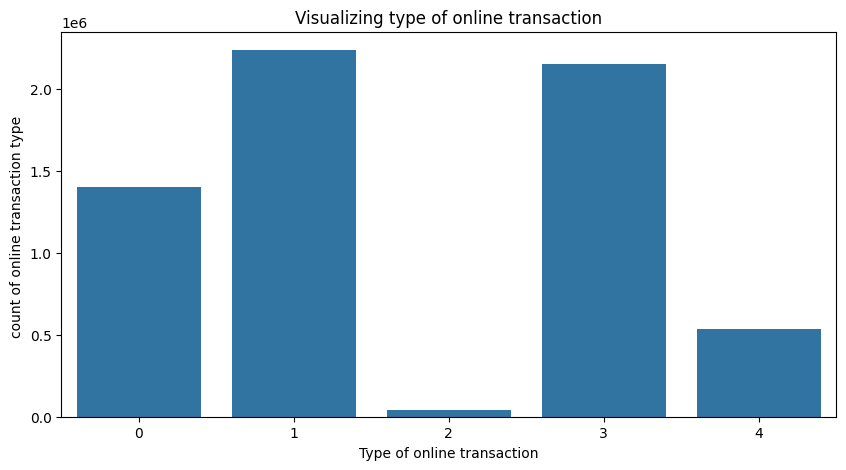

In [15]:
#univariate analysis
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= fraud_df)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

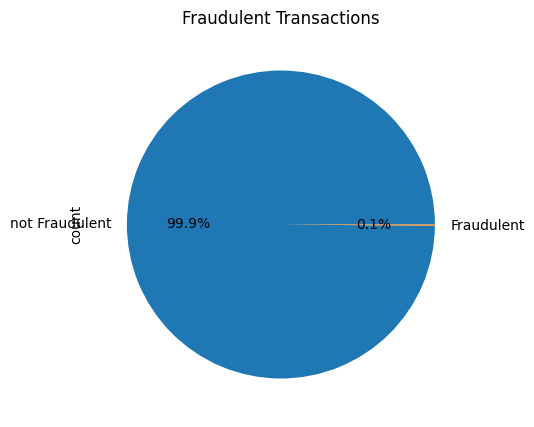

In [16]:
# create a function that properly labels isFraud

def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
fraud_df["fraud_transaction_label"] = fraud_df["isFraud"].apply(Fraud)


# create visualization
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
fraud_df.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')

**From this chart, its shows that most of the online transactions customers does is not fraudulent. Also the dataset is not balance**

<Axes: xlabel='step', ylabel='Density'>

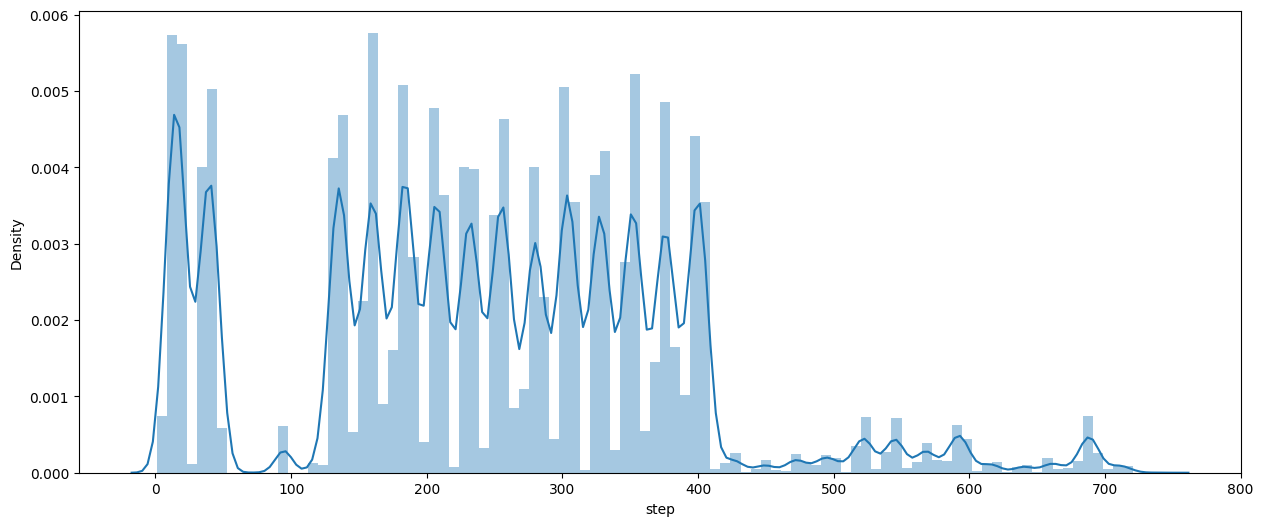

In [17]:
#To disable warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization for step column

plt.figure(figsize=(15,6))
sns.distplot(fraud_df['step'],bins=100)

<Axes: xlabel='type', ylabel='amount'>

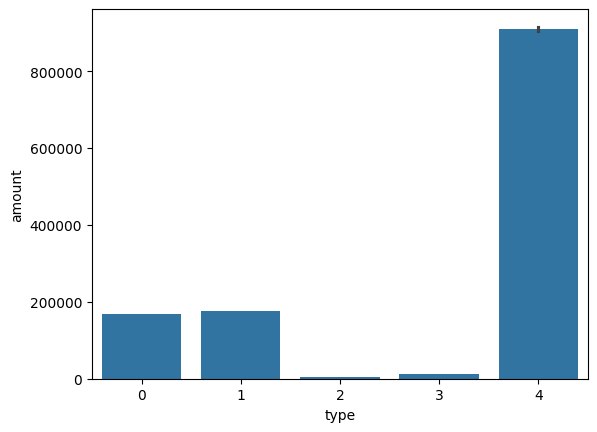

In [18]:
# Bivariate Analysis

sns.barplot(x='type',y='amount',data=fraud_df)

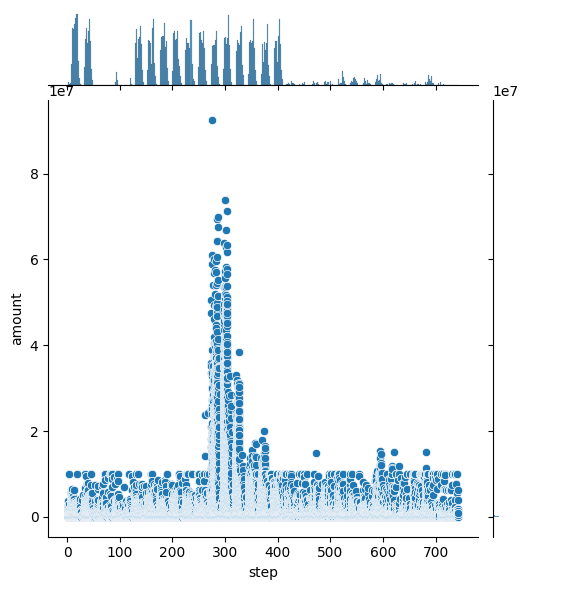

In [19]:
# Visualization between step and amount

sns.jointplot(x='step',y='amount',data=fraud_df)

Text(0, 0.5, 'fraud_transaction_label')

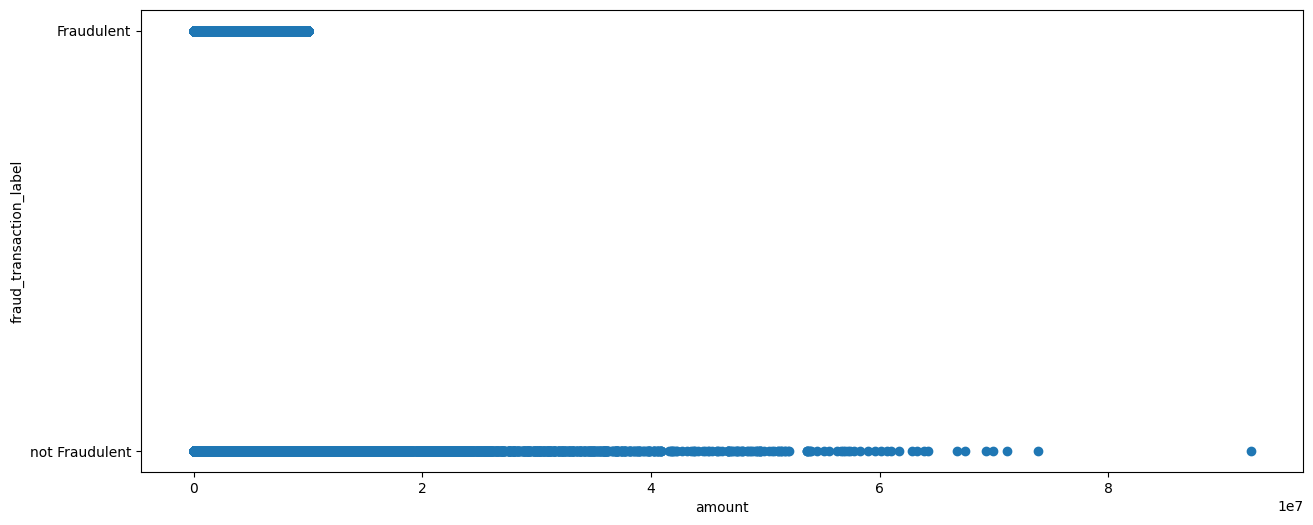

In [20]:
# Visualization between amount and fraud_transaction_label

plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='fraud_transaction_label',data=fraud_df)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')

<Axes: xlabel='type', ylabel='step'>

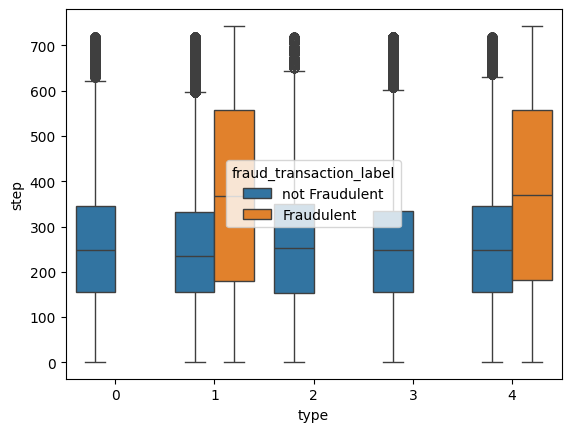

In [21]:
# Visualizing btw step,type and isFraud_label

sns.boxplot(x= "type", y= "step", hue ="fraud_transaction_label", data= fraud_df)

In [34]:
fraud_df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,0.00,0.00,No Fraud,0
1,1,3,1864.28,2188998,21249.00,19384.72,0.00,0.00,No Fraud,0
2,1,4,181.00,1002156,181.00,0.00,0.00,0.00,Fraud,0
3,1,1,181.00,5828262,181.00,0.00,21182.00,0.00,Fraud,0
4,1,3,11668.14,3445981,41554.00,29885.86,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,0.00,0.00,Fraud,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,2252932,850002.52,0.00,0.00,0.00,Fraud,0


<Axes: >

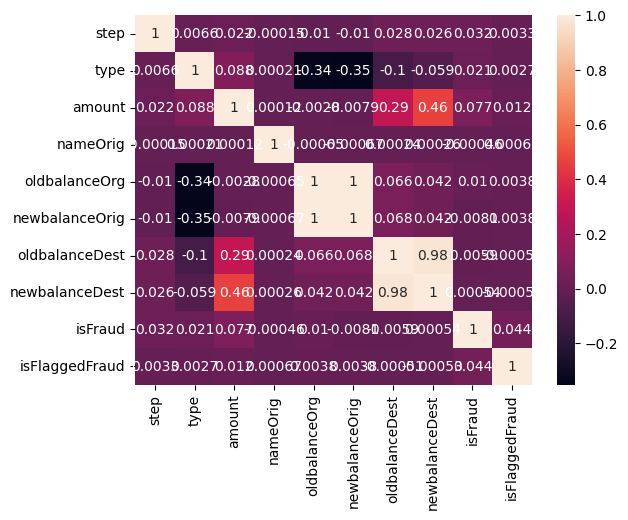

In [36]:
fraud_df=fraud_df[["step","type","amount","nameOrig","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud","isFlaggedFraud"]]
fraud_df['isFraud'] = fraud_df['isFraud'].replace({'Fraud': 1, 'No Fraud': 0})
# Correlation

c=fraud_df.corr()
sns.heatmap(c, annot =True)

In [37]:
fraud_df.corr()["isFraud"]

step              0.031578
type              0.020833
amount            0.076688
nameOrig         -0.000464
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

In [38]:
fraud_df.loc[:,'isFraud']=fraud_df['isFraud'].replace({0:"No Fraud",1:"Fraud"})
fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,0.00,0.00,No Fraud,0
1,1,3,1864.28,2188998,21249.00,19384.72,0.00,0.00,No Fraud,0
2,1,4,181.00,1002156,181.00,0.00,0.00,0.00,Fraud,0
3,1,1,181.00,5828262,181.00,0.00,21182.00,0.00,Fraud,0
4,1,3,11668.14,3445981,41554.00,29885.86,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,0.00,0.00,Fraud,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,2252932,850002.52,0.00,0.00,0.00,Fraud,0


In [39]:
fraud_df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [40]:
X=fraud_df.drop('isFraud',axis=1)
y=fraud_df['isFraud']


**Feature Scaling**

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Splitting of data**

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Importing the Decision Tree Model**

In [43]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=model.predict(X_test)
print(y_pred)

['No Fraud' 'No Fraud' 'No Fraud' ... 'No Fraud' 'No Fraud' 'No Fraud']


**Confusion Matrix**

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
def plot_confusion_matrix(y_test,y_pred):
    cm_ = confusion_matrix(y_test,y_pred)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

              precision    recall  f1-score   support

       Fraud       0.90      0.87      0.88      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



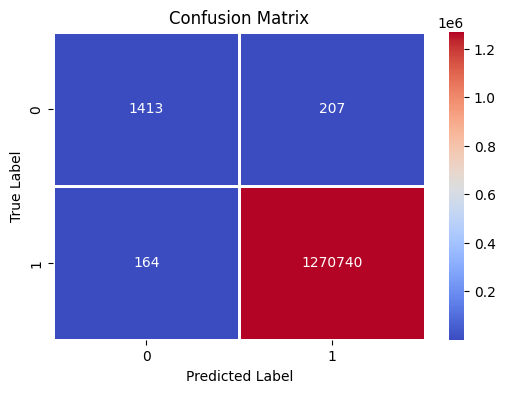

In [52]:
print(classification_report(y_test, y_pred)) 
plot_confusion_matrix(y_test,y_pred)

In [54]:
score = model.score(X_test, y_test)
print('Model Score:', score)
from sklearn.metrics import accuracy_score
print('\nAccuracy:', accuracy_score(y_test, y_pred))

Model Score: 0.9997084534358488

Accuracy: 0.9997084534358488


**Importing the Random Forest Model**

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [56]:
X_train = X_train[:50000]
y_train = y_train[:50000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[50000:200000]
y_train = y_train[50000:200000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[200000:1000000]
y_train = y_train[200000:1000000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[1000000:1500000]
y_train = y_train[1000000:1500000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[1500000:2000000]
y_train = y_train[1500000:2000000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[2000000:2500000]
y_train = y_train[2000000:2500000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[2500000:3000000]
y_train = y_train[2500000:3000000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[3000000:3500000]
y_train = y_train[3000000:3500000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[3500000:4000000]
y_train = y_train[3500000:4000000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[4000000:4500000]
y_train = y_train[4000000:4500000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[4500000:5000000]
y_train = y_train[4500000:5000000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[5000000:5500000]
y_train = y_train[5000000:5500000]
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred = clf.predict(X_test)

**Confusion Matrix for Random Forest**

              precision    recall  f1-score   support

       Fraud       0.99      0.71      0.82      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       1.00      0.85      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



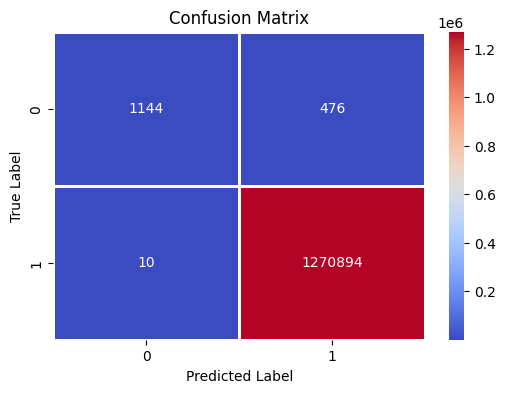

In [69]:
print(classification_report(y_test, y_pred)) 
plot_confusion_matrix(y_test,y_pred)

In [70]:
score = clf.score(X_test, y_test)
print('Model Score:', score)
from sklearn.metrics import accuracy_score
print('\nAccuracy:', accuracy_score(y_test, y_pred))

Model Score: 0.9996180818593599

Accuracy: 0.9996180818593599


**Thus we get a 99.96% accuracy through Random Forest Algorithm, while a 99.97% accuracy is achieved via Decision Tree Algorithm, on training data**

**CROSS VALIDATION**

**Conclusion:
Upon training and evaluating our classification model, we found that the Decision Tree Model performed the best by a narrow margin.**